###### Pewien eksperyment fizyczny generuje bardzo szybko stosunkowo krótkie ciągi liczb całkowitych z przedziału od $ 0 $ do $ 10^9 $. Pomiar w eksperymencie polega na okresleniu ile różnych liczb znajduje się w danym ciągu. Niestety liczby są generowane tak szybko, że konieczne jest zagwarantowanie czasu działania rzędu $ O(1) $ na każdy element ciągu (pamięć jest dużo mniej krytycznym zasobem). Ciągi są generowane błyskawicznie, jeden po drugim. Proszę zaproponować strukturę danych pozwalającą na przeprowadzenie eksperymentu.

###### Wymagane operacje, działające w czasie $ O(1) $:

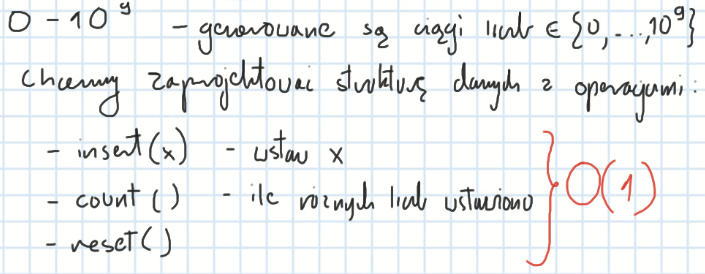

# I Sposób

### Omówienie algorytmu

###### UWAGA:
Poniższy algorytm zakłada konieczność wstępnego przygotowania tablicy, a więc jej wyzerowanie.

Jeżeli mamy powiedziane, że wstawianie nowych wartości oraz zliczanie różnych wartości ma sie odbywać w czasie stałym oraz wiemy, że ograniczenie pamięci praktycznie nie istnieje, najłatwiej jest stworzyć tablicę o rozmiarze odpowiadającym całemu zakresowi możliwych do wystąpienia wartości (tu o rozmiarze: $ 10^9 - 0 + 1 = 10^9 + 1 $).

###### Operacja insert

Ponieważ nie interesuje nas rzeczywiste przechowywanie wartości w tablicy, a jedynie zapewnienie ich szybkiego odczytu i zapisu informacji o ich obecności, dodanie wartości do tablicy możemy rozumieć jako zwiększenie licznika pod indeksem, odpowiadającym danej liczbie, o 1. Warto zauważyć, że nie jest konieczne zwiększanie licznika, jeżeli wartość już wcześniej była dodana do naszej struktury. Przyda nam się również zmienna pomocnicza, tzw. licznik epok. Pozwoli ona na określenie minimalnej wartości, jaka oznacza fakt, iż dana liczba została dodana więcej niż raz do naszej struktury. Początkowo licznik epok jest równy 0, a umieszczenie wartości utożsamiamy ze zwiekszeniem licznika w tablicy do wartości równej 1. W momencie, gdy przechodzimy do kolejnego pomiaru, konieczne jest stwierdzenie, czy dana wartość występowała wcześniej. Łatwo możemy dojść do wniosku, że dana wartość jest dodawana do tablicy po raz pierwszy, jeżeli licznik na odpowiadającym jej polu ma wartość mniejszą lub równą wartości licznika epok. W przeciwnym razie, wartość jest dodawana kolejny raz, więc nie modfikujemy już licznika.

###### Operacja count

Do zliczania różnych wartości najłatwiej wykorzystać pomocniczą zmienną, której wartość będziemy zwiększać tylko wtedy, gdy dodawana do struktury wartość wcześniej w niej nie występowała (patrz wyżej opis dodawania). Odczyt liczby różnych wartości jest równoznaczny ze zwróceniem wartości zmiennej, zliczającej te liczby.

###### Operacja reset

Resetowanie struktury jest równoznaczne z przejściem do kolejnej epoki, a więc zwiększeniem licznika epok o 1. Wówczas powyższe operacje będą odpowiednio się zachowywać, co zostało opisane wyżej, bez konieczności zerowania całej tablicy.

### Implementacja algorytmu

W poniższej implementacji tworzę tablicę jedynie na $ 100 $ elementów, ponieważ nie jest nam potrzebna tablica rozmiaru $ 10^9 + 1 $.

In [1]:
class Experiment:
    def __init__(self, size):
        self.counters = [0] * size
        self.unique_count = 0
        self.era = 1
    
    def insert(self, val):
        # Some error checking here
        if not isinstance(val, int):
            raise ValueError(f'Cannot store {val}. Value is not an integer.')
        if not 0 <= val < len(self.counters):
            raise ValueError(f'Cannot store {val}. Number too {"small" if val < 0 else "large"}')
        # If a counter is not greater than a number of the current era,
        # this number hasn't been stored yet, so we have to increment a counter.
        if self.counters[val] < self.era:
            self.counters[val] = self.era
            self.unique_count += 1
        # Else do nothing as a number is already present
    
    def count(self):
        # Return a number of unique values
        return self.unique_count
    
    def reset(self):
        # Increment an era value
        self.era += 1
        # Reset a counter of unique values
        self.unique_count = 0

###### Kilka testów

In [2]:
import random

size = 100
repetitions = 10
experiment = Experiment(size)

passed = 0
for i in range(1, repetitions + 1):
    random_vals = [random.randint(0, size-1) for _ in range(random.randint(0, size * 2))]
    unique_count = len(set(random_vals))

    for val in random_vals:
        experiment.insert(val)
    
    passed += experiment.count() == unique_count
    
    print("Expected:", unique_count)
    print("Result:  ", experiment.count())
    print(f"Current passed-to-tests ratio: {passed}/{i}")
    print()
    
    experiment.reset()

Expected: 80
Result:   80
Current passed-to-tests ratio: 1/1

Expected: 78
Result:   78
Current passed-to-tests ratio: 2/2

Expected: 32
Result:   32
Current passed-to-tests ratio: 3/3

Expected: 65
Result:   65
Current passed-to-tests ratio: 4/4

Expected: 44
Result:   44
Current passed-to-tests ratio: 5/5

Expected: 43
Result:   43
Current passed-to-tests ratio: 6/6

Expected: 76
Result:   76
Current passed-to-tests ratio: 7/7

Expected: 42
Result:   42
Current passed-to-tests ratio: 8/8

Expected: 68
Result:   68
Current passed-to-tests ratio: 9/9

Expected: 57
Result:   57
Current passed-to-tests ratio: 10/10



In [3]:
print(experiment.counters)

[9, 10, 10, 9, 8, 9, 8, 9, 10, 9, 10, 10, 10, 8, 10, 10, 10, 9, 9, 10, 10, 8, 9, 10, 10, 10, 9, 10, 9, 10, 10, 10, 8, 10, 10, 9, 10, 9, 10, 10, 8, 10, 8, 9, 7, 10, 9, 10, 5, 10, 10, 10, 10, 10, 9, 10, 8, 10, 9, 9, 10, 10, 10, 3, 10, 10, 10, 10, 10, 9, 10, 9, 10, 10, 10, 7, 9, 9, 9, 9, 10, 9, 9, 10, 9, 10, 10, 9, 10, 10, 7, 9, 10, 10, 9, 7, 10, 10, 10, 10]


# II sposób

### Implementacja algorytmu

Zakładamy, że jesteśmy w stanie zaalokować tablicę w czasie stałym, jak ma to miejsce w innych językach programowania, bez konieczności jej inicjalizacji. Do zaimitowania tego zachowania wykorzystamy poniższą klasę.

##### Klasa pomocnicza

In [4]:
import random

def rand_int(bits=16):
    return random.randint(0, 2 ** 16)

class Array:
    def __init__(self, size):
        self.values = [rand_int() for _ in range(size)]
        
    def __getitem__(self, idx):
        if 0 <= idx < len(self.values):
            return self.values[idx]
        # Imitate access to the index beyond of an the array
        return rand_int()
    
    def __setitem__(self, idx, val):
        if 0 <= idx < len(self.values):
            self.values[idx] = val

##### Właściwy algorytm

In [5]:
class Experiment:
    def __init__(self, size):
        self.data = Array(size)  # Assume this works as in different languages and is O(1)
        self.stack = Array(size)
        self.size = size
        self.stack_idx = 0  # The last empty field index
        
    def insert(self, val):
        # Some error checking here
        if not isinstance(val, int):
            raise IndexError(f'Cannot store {val}. Value is not an integer.')
        if not 0 <= val < self.size:
            raise IndexError(f'Cannot store {val}. Number too {"small" if val < 0 else "large"}')
            
        # Check if there is valid data stored
        if not isinstance(self.data[val], list) \
            or self.data[val][1] >= self.stack_idx \
            or self.stack[self.data[val][1]] != val:
            # Overwrite the previous value with the new one 
            self.data[val] = [1, self.stack_idx]  # Store data as counter, stack_idx pairs
            # Store a pointer back to a data array on a stack
            self.stack[self.stack_idx] = val
            self.stack_idx += 1
        # Increase a counter otherwise (if this slot of a data array is not empty
        # and is valid)
        else: self.data[val][0] += 1
            
    def count(self):
        # Stack index will be always equal to the number of unique values
        return self.stack_idx
    
    def reset(self):
        # The whole reset idea is to make all values stored not valid in order to
        # ensure that all the values newly inserted won't be affected by previous values
        self.stack_idx = 0

###### Kilka testów

In [6]:
import random

size = 100
repetitions = 10
experiment = Experiment(size)

passed = 0
for i in range(1, repetitions + 1):
    random_vals = [random.randint(0, size-1) for _ in range(random.randint(0, size * 4))]
    unique_count = len(set(random_vals))

    for val in random_vals:
        experiment.insert(val)
    
    passed += experiment.count() == unique_count
    
    print("Expected:", unique_count)
    print("Result:  ", experiment.count())
    print(f"Current passed-to-tests ratio: {passed}/{i}")
    print()
    
    experiment.reset()

Expected: 95
Result:   95
Current passed-to-tests ratio: 1/1

Expected: 29
Result:   29
Current passed-to-tests ratio: 2/2

Expected: 97
Result:   97
Current passed-to-tests ratio: 3/3

Expected: 90
Result:   90
Current passed-to-tests ratio: 4/4

Expected: 90
Result:   90
Current passed-to-tests ratio: 5/5

Expected: 96
Result:   96
Current passed-to-tests ratio: 6/6

Expected: 97
Result:   97
Current passed-to-tests ratio: 7/7

Expected: 89
Result:   89
Current passed-to-tests ratio: 8/8

Expected: 63
Result:   63
Current passed-to-tests ratio: 9/9

Expected: 92
Result:   92
Current passed-to-tests ratio: 10/10

